**TASK 1**

In [44]:
# Import pandas to load, manipulate, and analyze structured data (like CSV files or DataFrames)
import pandas as pd

# Import seaborn for advanced data visualization (built on top of matplotlib)
import seaborn as sns

# Import matplotlib's pyplot module to create plots, charts, and graphs
import matplotlib.pyplot as plt


In [10]:
# Load built-in Iris dataset from seaborn
iris = sns.load_dataset("iris")


In [11]:
# Shape of the dataset
print("Shape of dataset:", iris.shape)

# Column names
print("\nColumn Names:", iris.columns.tolist())

# First 5 rows
print("\nFirst 5 rows:")
print(iris.head())

# Info
print("\nDataset Info:")
print(iris.info())

# Describe
print("\nSummary Statistics:")
print(iris.describe())


Shape of dataset: (150, 5)

Column Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary

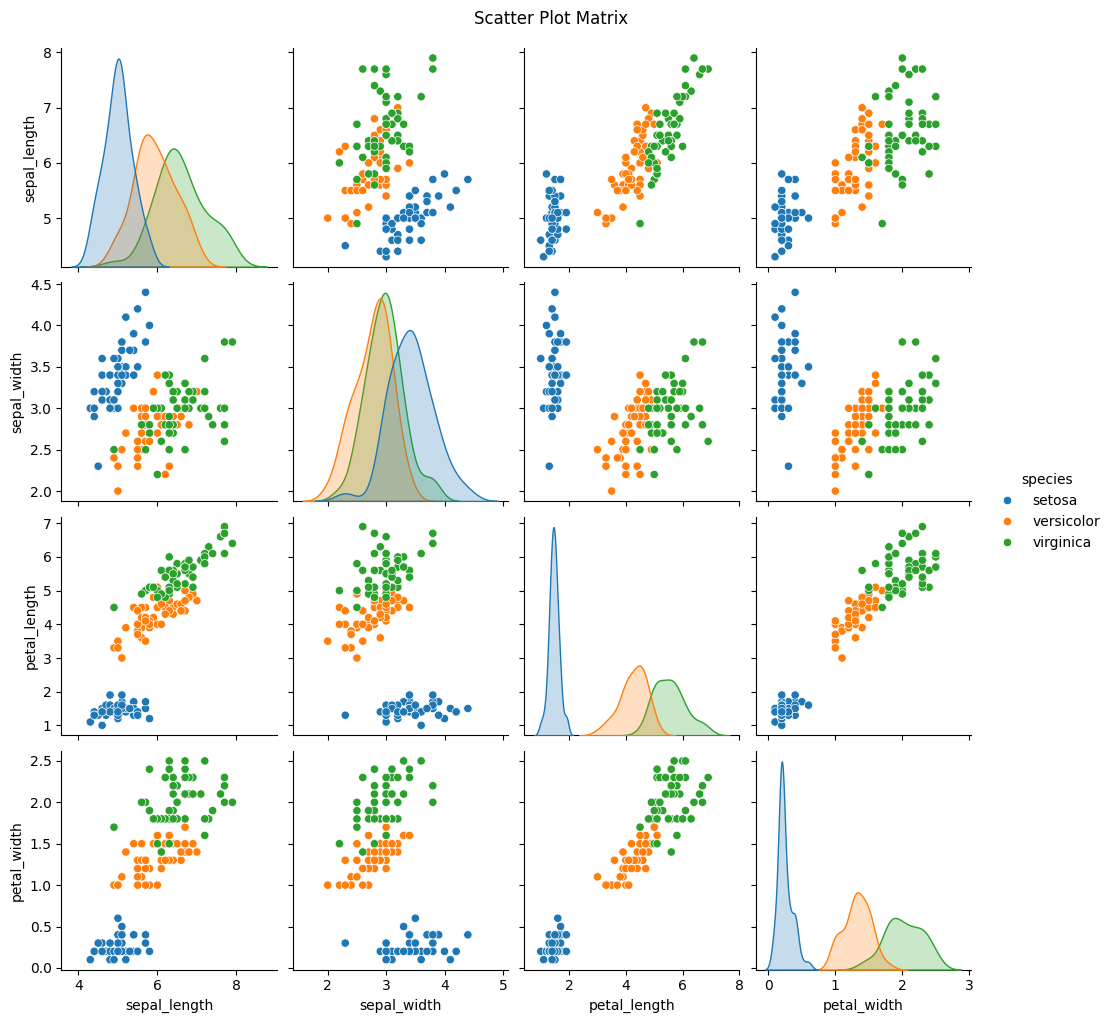

In [ ]:
# Pairplot to show all scatter plots between features
sns.pairplot(iris, hue="species")
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()


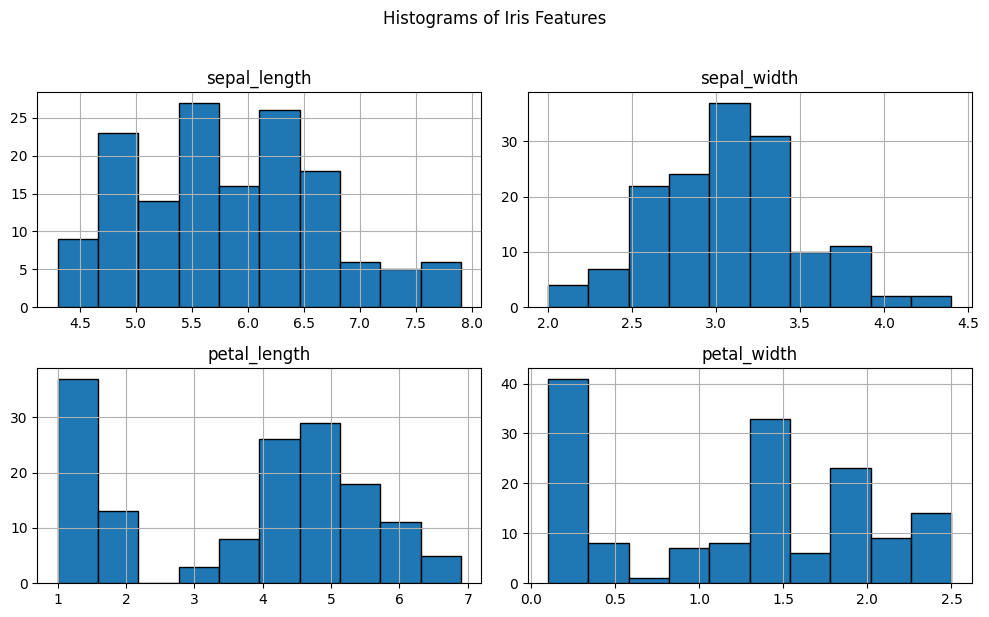

In [ ]:
# Histogram for each feature
iris.hist(edgecolor='black', figsize=(10, 6))
plt.suptitle("Histograms of Iris Features", y=1.02)
plt.tight_layout()
plt.show()


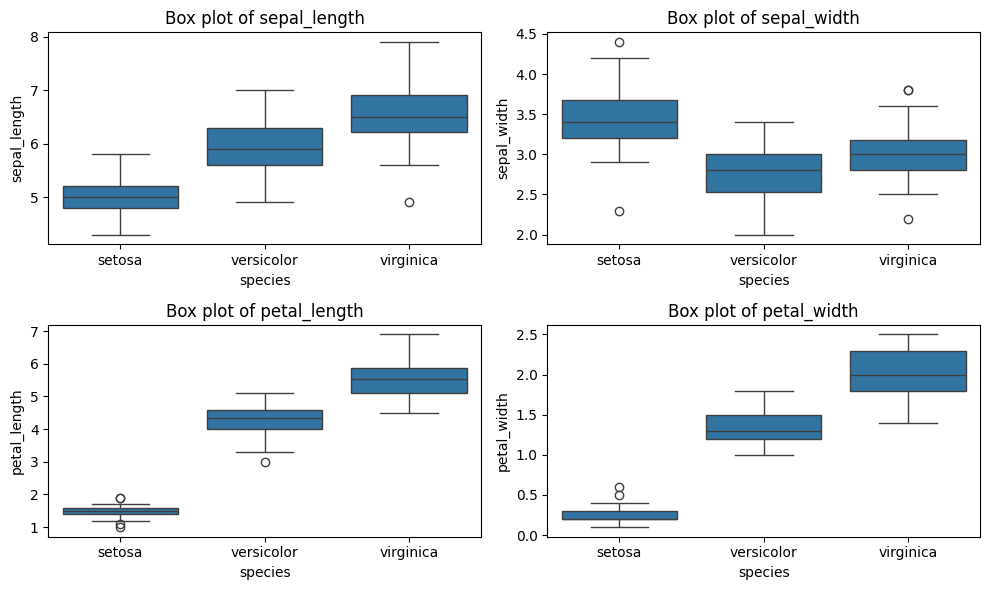

In [ ]:
# Boxplots for each feature
plt.figure(figsize=(10, 6))
for i, column in enumerate(iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="species", y=column, data=iris)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


**TASK 2**

In [12]:
pip install yfinance scikit-learn matplotlib pandas


In [38]:
# Import yfinance to download historical stock market data directly from Yahoo Finance
import yfinance as yf

# Import pandas to handle dataframes (tabular data)
import pandas as pd

# Import matplotlib for visualizing data and model predictions
import matplotlib.pyplot as plt

# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import LinearRegression to build a simple regression model for predicting stock prices
from sklearn.linear_model import LinearRegression

# Import evaluation metrics:
# mean_squared_error for checking average squared difference between actual and predicted values
# r2_score to check how well the model explains the variation in the data
from sklearn.metrics import mean_squared_error, r2_score


In [39]:
# Select a stock (e.g., Apple: AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2024-12-31")

# Show first few rows
print(data.head())


/tmp/ipython-input-39-1505423799.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2023-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2023-01-03  123.470604  129.226044  122.582112  128.613978  112117500
2023-01-04  124.744125  127.014716  123.480495  125.267347   89113600
2023-01-05  123.421257  126.136090  123.164587  125.504275   80962700
2023-01-06  127.962456  128.623886  123.292946  124.398626   87754700
2023-01-09  128.485672  131.703994  128.229002  128.801587   70790800


In [40]:
# Drop rows with NaN values
data = data.dropna()

# Features and Target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [42]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.3051671204106228
R² Score: 0.9883210903453091


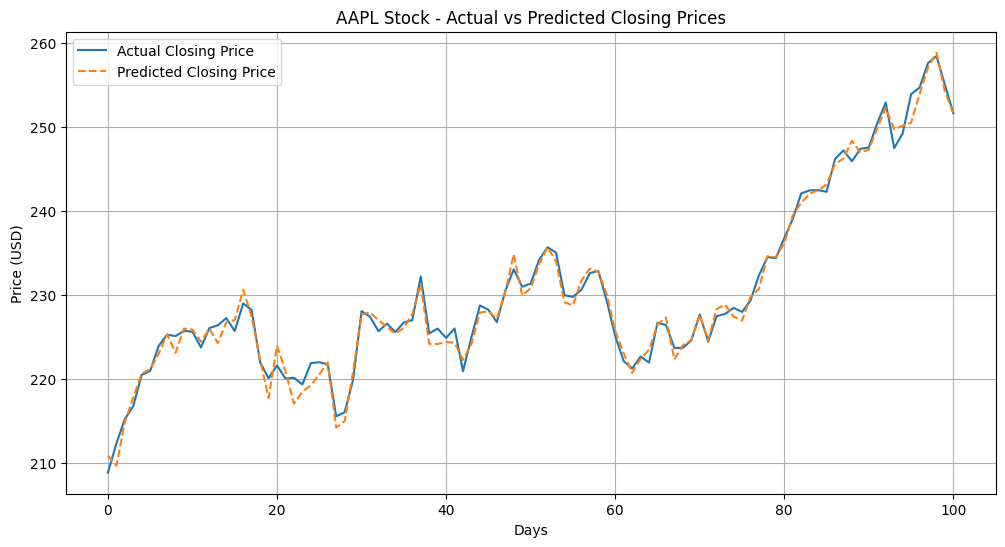

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Closing Price')
plt.plot(y_pred, label='Predicted Closing Price', linestyle='--')
plt.title(f"{ticker} Stock - Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


**TASK 6**

In [19]:
pip install pandas scikit-learn matplotlib seaborn


In [29]:
# Import necessary libraries for data analysis and visualization
import pandas as pd         # For loading and handling tabular data
import numpy as np          # For numerical operations
import seaborn as sns       # For advanced visualizations
import matplotlib.pyplot as plt  # For plotting

# Import scikit-learn modules for model training and evaluation
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.linear_model import LinearRegression     # Linear Regression model
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting model (more powerful)
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For model evaluation
from sklearn.preprocessing import StandardScaler       # For feature scaling (normalization)



In [30]:
# Load the dataset (replace path with actual file path if needed)
df = pd.read_csv("/content/kc_house_data.csv")

# Preview
print(df.head())


           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [31]:
# Select relevant columns
data = df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'zipcode']]

# One-hot encode the 'zipcode' column
data = pd.get_dummies(data, columns=['zipcode'], drop_first=True)

# Split features and target
X = data.drop('price', axis=1)
y = data['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
model = LinearRegression()


In [33]:
# model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model = GradientBoostingRegressor()


In [34]:
model.fit(X_train_scaled, y_train)


GradientBoostingRegressor()

In [35]:
# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 124273.39
Root Mean Squared Error (RMSE): 216388.41


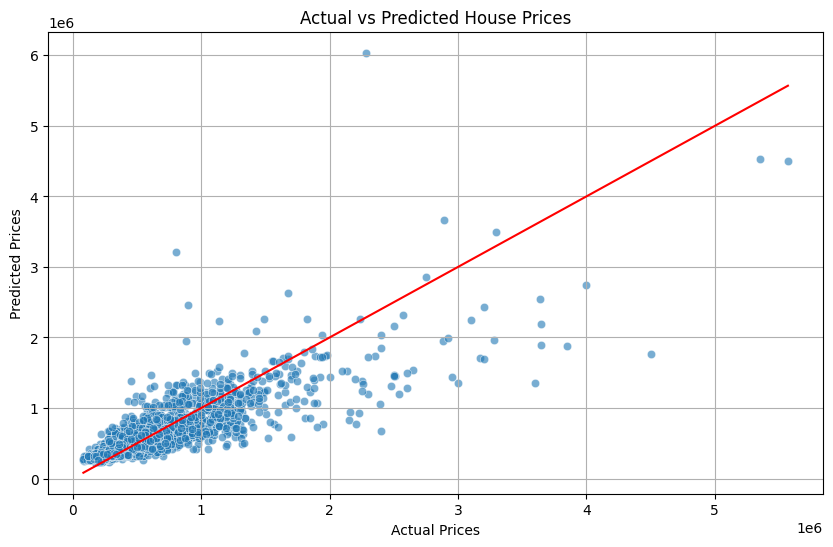

In [37]:
# Set the figure size for the plot (width=10, height=6 inches)
plt.figure(figsize=(10, 6))

# Create a scatter plot: actual prices vs predicted prices
# alpha=0.6 makes the points slightly transparent for better visibility
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Label the x-axis
plt.xlabel("Actual Prices")

# Label the y-axis
plt.ylabel("Predicted Prices")

# Add a title to the plot
plt.title("Actual vs Predicted House Prices")

# Draw a red reference line (perfect prediction line where predicted = actual)
# This helps to visually compare how close the predictions are to actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')

# Add a grid to the background for easier reading
plt.grid(True)

# Show the final plot
plt.show()


In [45]:
# Create a README.md file with content
readme_content = """
# AI/ML Internship Tasks

## 📌 Task 1: Iris Dataset Exploration
- Load and visualize the Iris dataset
- Used pandas, seaborn, and matplotlib
- Performed EDA with scatter plots, histograms, and boxplots

## 📌 Task 2: Stock Price Prediction
- Fetched historical stock data using yfinance
- Built a Linear Regression model to predict closing prices
- Evaluated model using MSE and R²

## 📌 Task 6: House Price Prediction
- Preprocessed real estate dataset (bedrooms, sqft, location)
- Used Gradient Boosting Regressor
- Visualized predictions vs actual
- Evaluated using MAE and RMSE

## ✅ Tools Used
- Python, Pandas, NumPy, Seaborn, Matplotlib
- scikit-learn, yfinance
"""

# Save to file
with open("README.md", "w") as f:
    f.write(readme_content)


In [46]:
from google.colab import files
files.download("README.md")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>